[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1

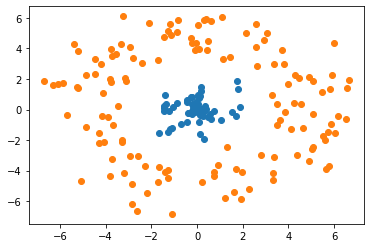

In [5]:
#6b

from keras.models import Sequential 
from keras.layers import Dense
from keras.utils import *

import numpy as np

np.random.seed(0);

def get_cov(sdx=1., sdy=1., rotangdeg=0.):
    covar = np.array([[sdx, 0], [0, sdy]])
    rot_ang = rotangdeg / 360 * 2 * np.pi
    rot_mat = np.array([[np.cos(rot_ang), -np.sin(rot_ang)], [np.sin(rot_ang), np.cos(rot_ang)]])

    covar = np.matmul(np.matmul(rot_mat, covar), rot_mat.transpose())
    return covar


def gen_circular_distribution(n=500, scale=1):
    a = np.round(n / 7).astype('int')
    b = np.round(2*n / 7).astype('int')
    c = n - a - b
    r1 = np.concatenate(
        [np.random.normal(loc=2, scale=scale, size=[a, 1]), np.random.normal(loc=8, scale=scale, size=[c, 1])])
    r2 = np.random.normal(loc=5, scale=scale, size=[b, 1])

    th1 = np.random.uniform(low=0, high=2 * np.pi, size=[a+c, 1])
    th2 = np.random.uniform(low=0, high=2 * np.pi, size=[b, 1])

    x1a = r1 * np.cos(th1)
    x2a = r1 * np.sin(th1)

    x1b = r2 * np.cos(th2)
    x2b = r2 * np.sin(th2)

    X = np.concatenate([np.concatenate([x1a.reshape([a+c, 1]), x1b.reshape([b, 1])]),
                        np.concatenate([x2a.reshape([a+c, 1]), x2b.reshape([b, 1])])], axis=1)

    y = np.concatenate([np.zeros([a+c, 1]), np.ones([b, 1])]).squeeze()
    return X, y


def gen_simple_circular_distribution(n=100, scale=1):
    a = np.round(n/3).astype('int')
    b = n-a
    r1 = np.random.normal(loc=0, scale=scale, size=[a, 1])
    r2 = np.random.normal(loc=5, scale=scale, size=[b, 1])

    th1 = np.random.uniform(low=0, high=2 * np.pi, size=[a, 1])
    th2 = np.random.uniform(low=0, high=2 * np.pi, size=[b, 1])

    x1a = r1 * np.cos(th1)
    x2a = r1 * np.sin(th1)

    x1b = r2 * np.cos(th2)
    x2b = r2 * np.sin(th2)

    X = np.concatenate([np.concatenate([x1a.reshape([a, 1]), x1b.reshape([b, 1])]),
                        np.concatenate([x2a.reshape([a, 1]), x2b.reshape([b, 1])])], axis=1)

    y = np.concatenate([np.zeros([a, 1]), np.ones([b, 1])]).squeeze()
    return X, y


def gen_xor_distribution(n=100):
    a = np.round(n / 4).astype('int')
    b = n-a*3
    xc1 = np.concatenate([np.random.multivariate_normal([-2.3, -2.3], get_cov(0.4, 0.1, -45), a),
                          np.random.multivariate_normal([2.3, 2.3], get_cov(0.4, 0.1, -45), a)])
    xc2 = np.concatenate([np.random.multivariate_normal([-2.3, 2.3], get_cov(0.4, 0.1, 45), a),
                          np.random.multivariate_normal([2.3, -2.3], get_cov(0.4, 0.1, 45), b)])
    xc = np.array(np.concatenate([xc1, xc2]))

    y = np.array(np.concatenate([np.zeros([2 * a, 1]), np.ones([a+b, 1])])).squeeze()
    X = xc
    return X, y

X, y = gen_simple_circular_distribution(200)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(X[y == 0, 0], X[y == 0, 1])
ax.scatter(X[y == 1, 0], X[y == 1, 1])

model = Sequential()

model.add(Dense(units=4, activation='relu', input_dim=2)) 
model.add(Dense(units=4, activation='relu')) 
model.add(Dense(units=2, activation='softmax')) 



model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

y_binary = to_categorical(y)


#model.fit(X, y_binary, epochs=250, batch_size=32)

#generate the grid using a function
def gen_sample_grid(npx=200, npy=200, limit=1):
  x1line = np.linspace(-limit, limit, npx)
  x2line = np.linspace(-limit, limit, npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid,x1line,x2line

lim = 8
Xgrid,x1line,x2line = gen_sample_grid(limit=lim)

out_values = model.predict(Xgrid)

out_grid = np.reshape(out_values[:, 0], [200, 200])

#fig, ax = plt.subplots()
#plt.contourf(x1line,x2line,out_grid)

#ax.scatter(X[y == 0, 0], X[y == 0, 1], marker='x', s=2)
#ax.scatter(X[y == 1, 0], X[y == 1, 1], marker='x', s=2)
#plt.xlim(-lim, lim)
#plt.ylim(-lim, lim)

In [ ]:
#6a
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

x = np.linspace(0, 1, 200)

#set up a function of x
y = x.copy()
y[x < 0.1] = 0
y[x >= 0.1] = 0.5*(x[x >= 0.1]-0.1)
y[x >= 0.6] = 0.25-0.25/0.2*(x[x >= 0.6]-0.6)
y[x > 0.8] = 0

fig, ax = plt.subplots()
plt.plot(x,y)

#now try fitting the function with a neural network
from keras.models import Sequential 
from keras.layers import Dense
from keras.utils import *

model = Sequential()
#single layered model
#model.add(Dense(units=3, activation='relu', input_dim=1)) 
model.add(Dense(units=150, activation='relu', input_dim=1)) 
#model.add(Dense(units=150, activation='sigmoid', input_dim=1)) 
#model.add(Dense(units=150, activation='tanh', input_dim=1)) 
#model.add(Dense(units=150, activation='softplus', input_dim=1)) 

#try a multi-layered model
#activation_function = 'relu'
#activation_function = 'tanh'
#model.add(Dense(units=10, activation=activation_function, input_dim=1)) 
#model.add(Dense(units=10, activation=activation_function)) 
#model.add(Dense(units=10, activation=activation_function)) 

model.add(Dense(units=1, activation='linear'))

model.compile(loss="mean_squared_error",
              optimizer='adam',
               metrics=['accuracy'])

#First attempt:
model.fit(x, y, epochs=2000, batch_size=32)

y_pred = model.predict(x)


fig, ax = plt.subplots()
plt.plot(x,y,'b-')
plt.plot(x,y_pred,'k--')

In [ ]:
#6c